# Prodigy Infotech Task 5
### Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import numpy as np
import pandas as pd 

### Data Loading and Reading 

In [3]:
df = pd.read_csv('US_Accidents_March23.csv') 
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [7]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values != 0 ]  
missing_values = missing_values.sort_values(ascending = False) 
missing_values

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
dtype: int64

Convert the values into percentage

<Axes: >

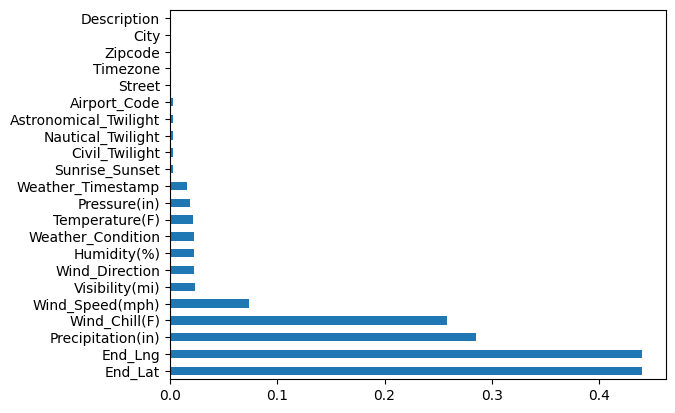

In [8]:
missing_values = missing_values / len(df) 
missing_values.plot(kind = 'barh') 

### Exploratory Analysis and Visulization

  

In [9]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
accident_per_city = df.City.value_counts()
accident_per_city[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [11]:
cities = df.City.unique()
cities

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

Top cities with higgest accidents

<Axes: ylabel='City'>

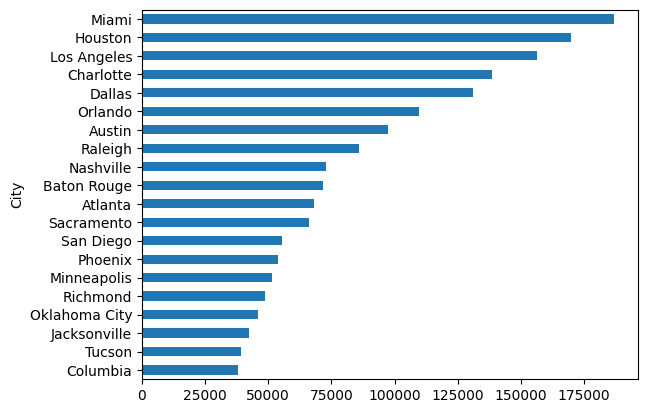

In [12]:
accident_per_city[:20].sort_values(ascending = True).plot(kind='barh') 

In [13]:
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
sns.set_style('darkgrid') 

Distribution of the accident per city

<Axes: xlabel='count', ylabel='Density'>

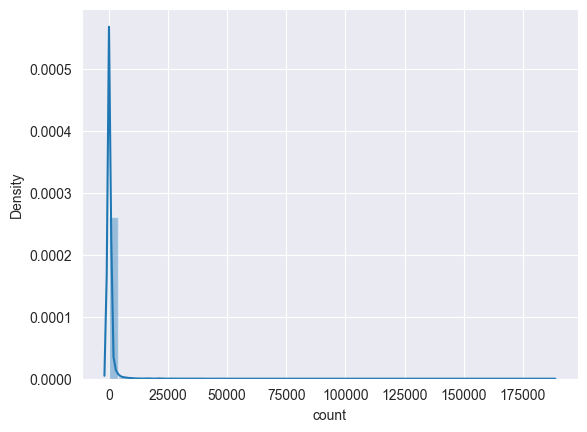

In [14]:
accident_per_city = df.City.value_counts() 
sns.distplot(accident_per_city)   

In [15]:
high_accident_cities = accident_per_city[accident_per_city >= 1000]
low_accident_cities  = accident_per_city[accident_per_city < 1000 ]  

In [16]:
len(high_accident_cities)/ len(cities) * 100,   len(low_accident_cities) / len(cities) * 100 

(8.904159660793917, 91.0885298632941)

<Axes: xlabel='count', ylabel='Density'>

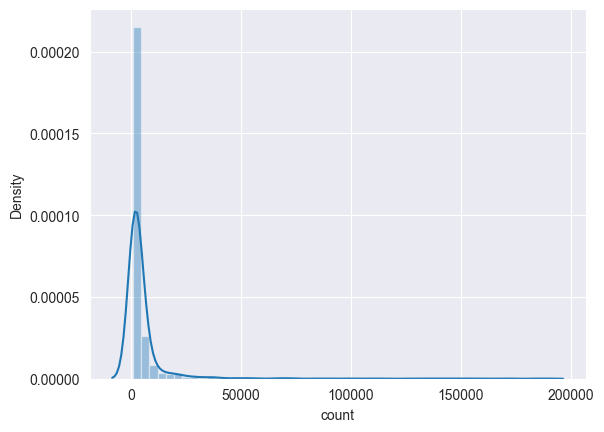

In [17]:
import warnings 
sns.distplot(high_accident_cities)

### Start Time

In [18]:
df.Start_Time = pd.to_datetime(df['Start_Time'] , format='mixed', errors='coerce' ) 

<Axes: xlabel='Start_Time'>

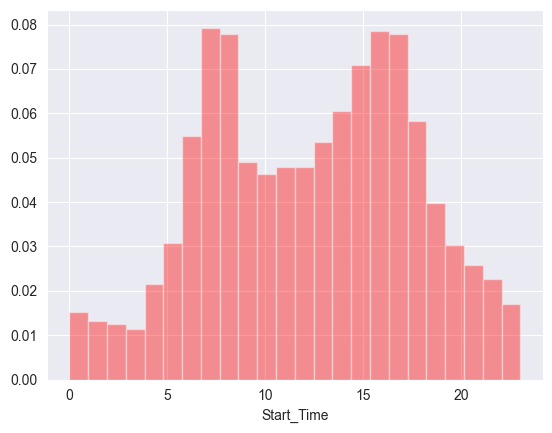

In [20]:
sns.distplot( df.Start_Time.dt.hour , bins = 24 , kde = False, norm_hist = True ,color = 'red') # norma_hist convert into per.  

<Axes: xlabel='Start_Time'>

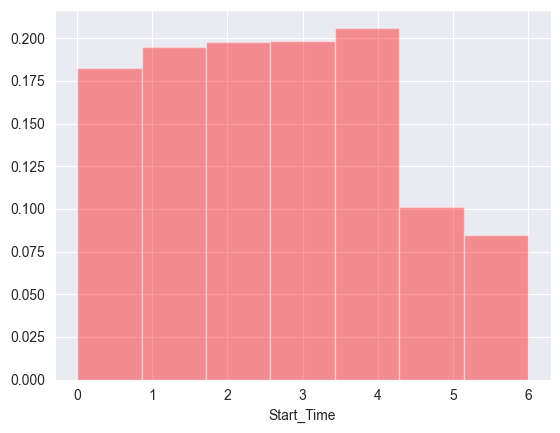

In [21]:
sns.distplot( df.Start_Time.dt.dayofweek , bins = 7 , kde = False , norm_hist = True , color = 'red')   

Distribution of accident on normal working day

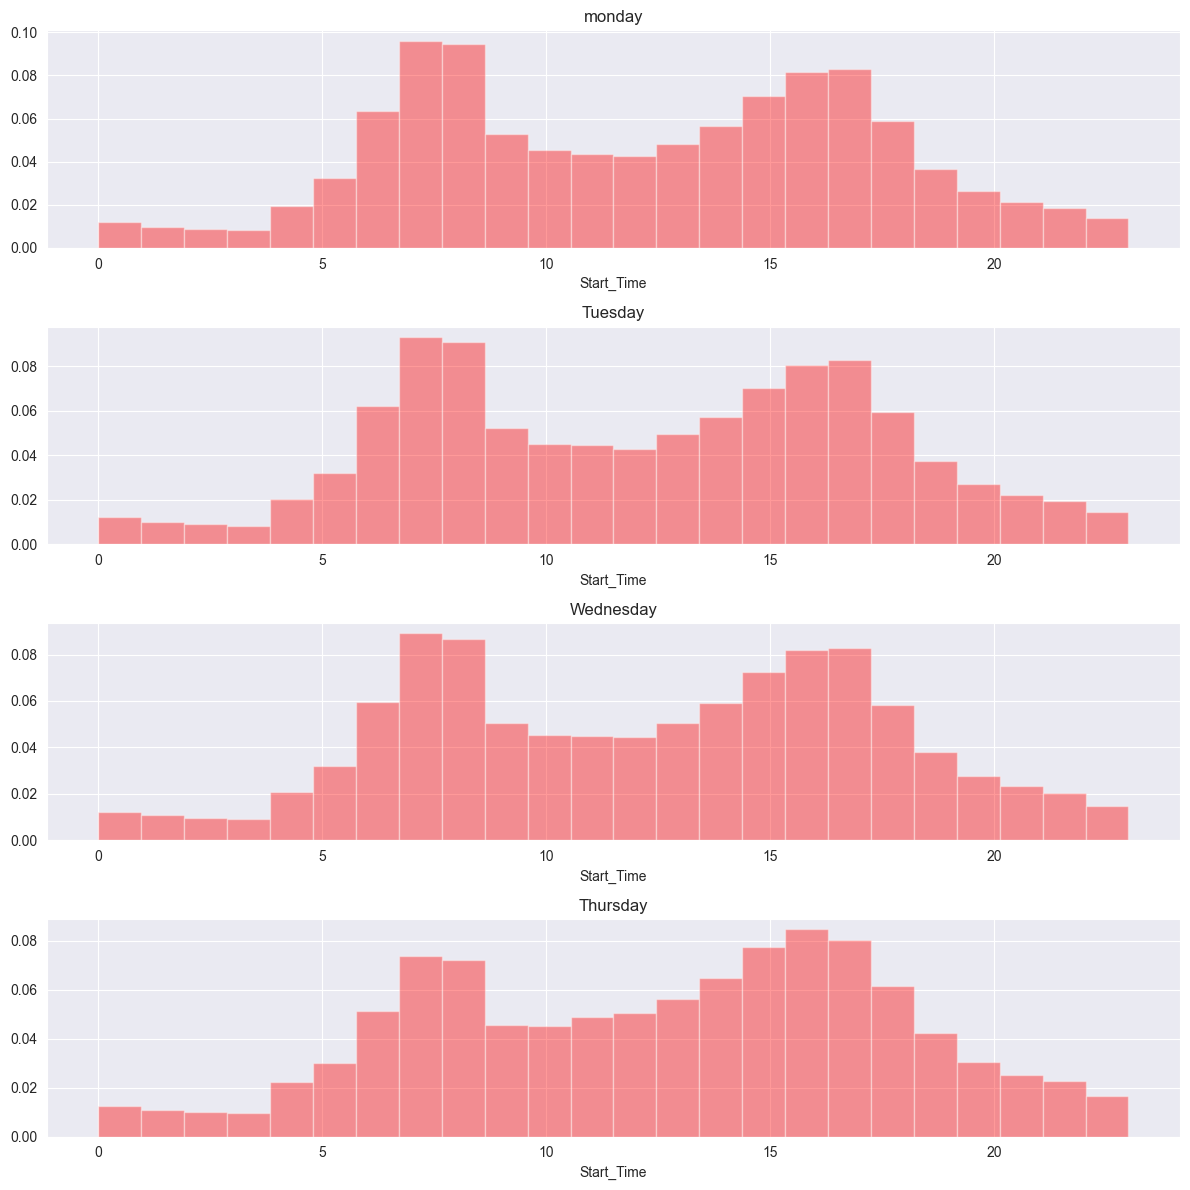

In [22]:
 import matplotlib.pyplot as plt 

mon_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 1 ] 
tues_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 2 ] 
wednes_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 3 ] 
thurs_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 4 ] 

fig , axis = plt.subplots(4,1 , figsize = ( 12 , 12)) 
sns.distplot(mon_day.dt.hour , bins = 24 , kde = False ,norm_hist = True ,ax = axis[0] , color = 'red').set_title('monday') 
sns.distplot(tues_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[1] , color = 'red').set_title('Tuesday')
sns.distplot(wednes_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[2] , color = 'red').set_title('Wednesday') 
sns.distplot(thurs_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[3] , color = 'red').set_title('Thursday')
fig.tight_layout()

Distribution of accident time on the weekends 

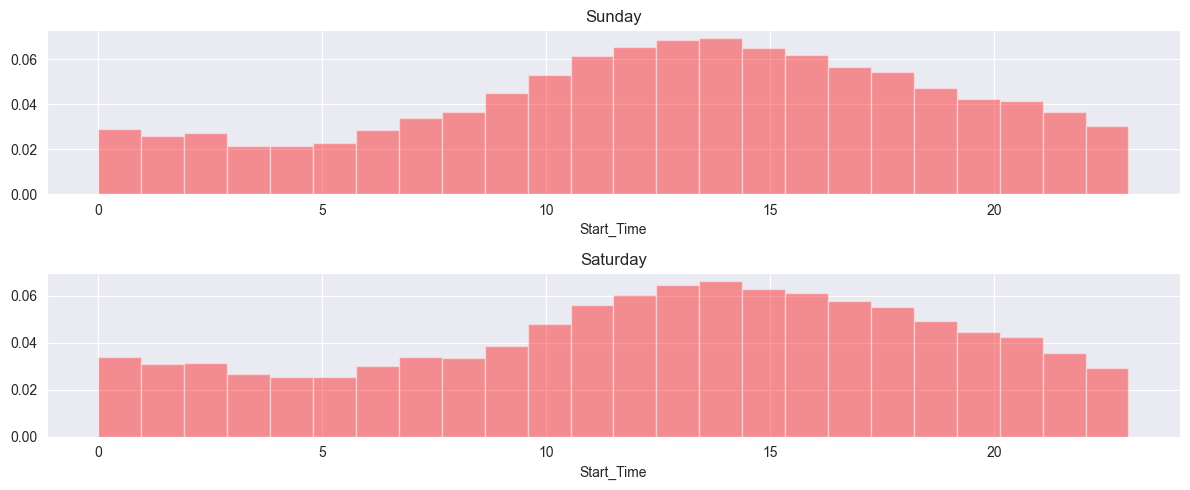

In [23]:
import matplotlib.pyplot as plt 

sun_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 5 ] 
sat_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 6 ]

fig , axis = plt.subplots(2,1 , figsize = (12 ,5))
sns.distplot(sun_day.dt.hour , bins = 24 , kde = False ,norm_hist = True ,ax = axis[0] , color = 'red').set_title('Sunday') 
sns.distplot(sat_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[1] , color = 'red').set_title('Saturday') 
fig.tight_layout()

<Axes: xlabel='Start_Time'>

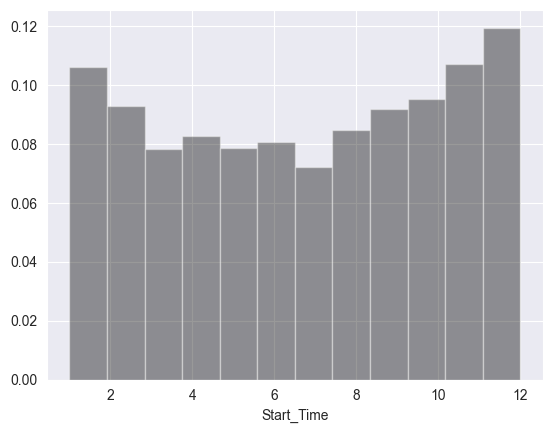

In [24]:
sns.distplot( df.Start_Time.dt.month , kde = False , bins = 12 , norm_hist = True , color = 'black')

Yearly

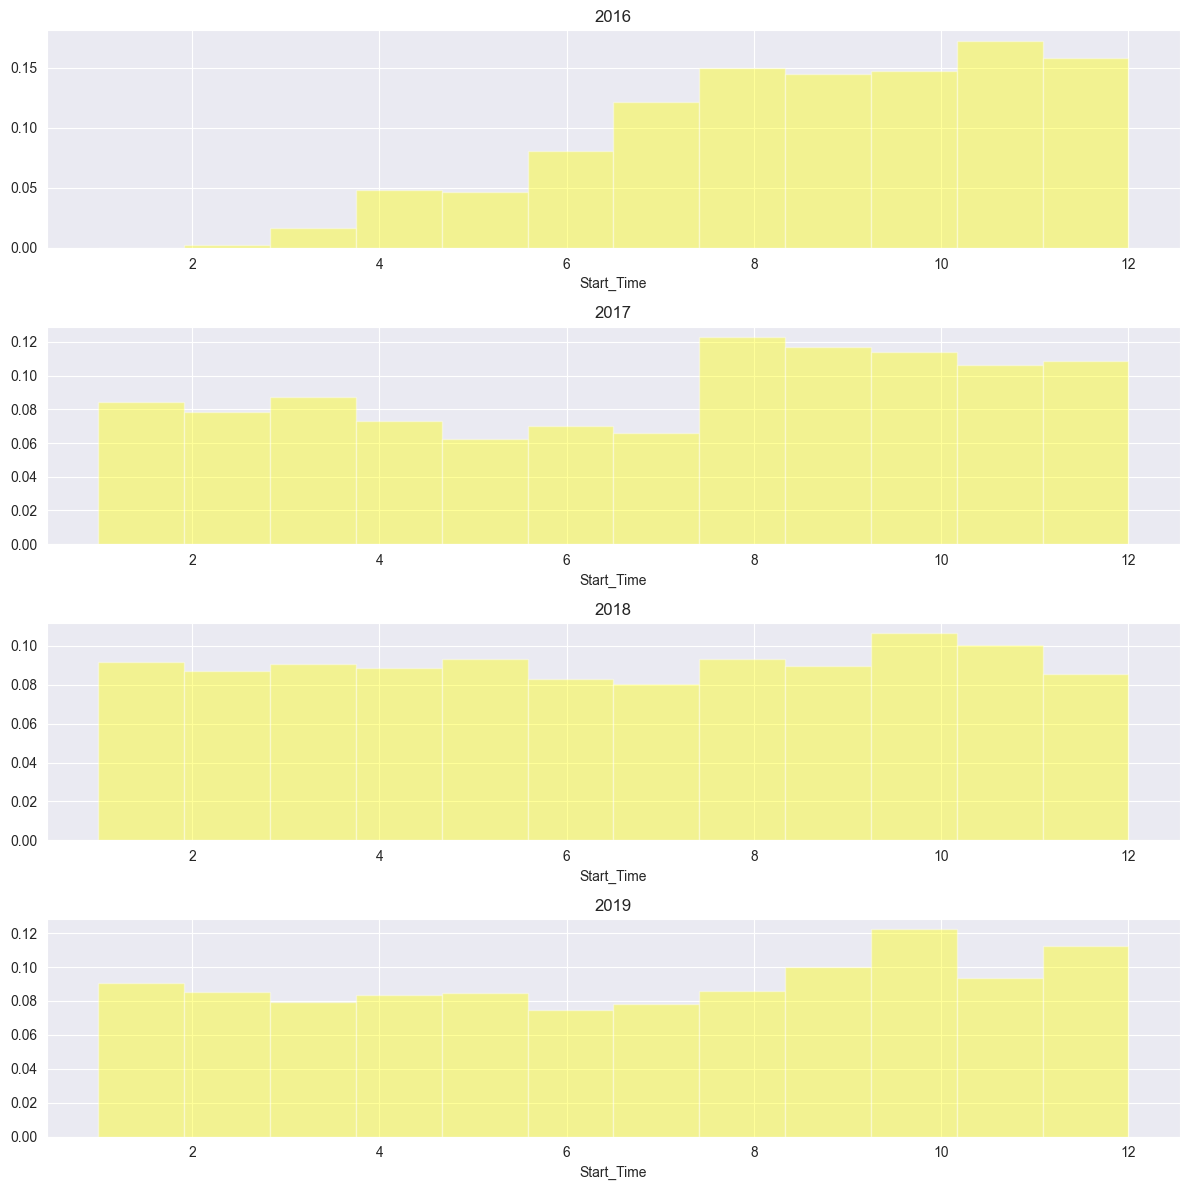

In [25]:
data_2016 = df.Start_Time [ df.Start_Time.dt.year == 2016 ] 
data_2017 = df.Start_Time [ df.Start_Time.dt.year == 2017 ] 
data_2018 = df.Start_Time [ df.Start_Time.dt.year == 2018 ] 
data_2019 = df.Start_Time [ df.Start_Time.dt.year == 2019 ] 

fig , axes = plt.subplots( 4, 1, figsize = (12,12) )
sns.distplot(data_2016.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[0] , color = 'yellow').set_title('2016')
sns.distplot(data_2017.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[1] , color = 'yellow' ).set_title('2017')
sns.distplot(data_2018.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[2] , color = 'yellow' ).set_title('2018')
sns.distplot(data_2019.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[3] , color = 'yellow' ).set_title('2019')
fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


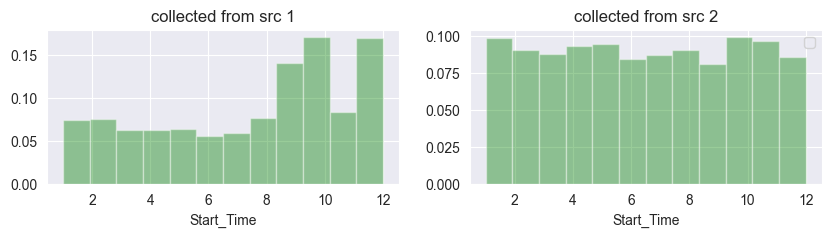

In [26]:
df_2019_data_src1 = data_2019[df.Source == 'Source1' ] 
df_2019_data_src2 = data_2019[df.Source == 'Source2' ] 

plt.figure(figsize=(10 , 2))
plt.subplot(1,2,1) 
sns.distplot( df_2019_data_src1.dt.month , bins = 12 , kde = False , norm_hist = True  , color = 'green')
plt.title('collected from src 1') 
plt.subplot(1,2,2) 
sns.distplot( df_2019_data_src2.dt.month , bins = 12 , kde = False , norm_hist = True , color ='green') 
plt.title('collected from src 2') 
plt.legend() 
plt.show()

<Axes: ylabel='count'>

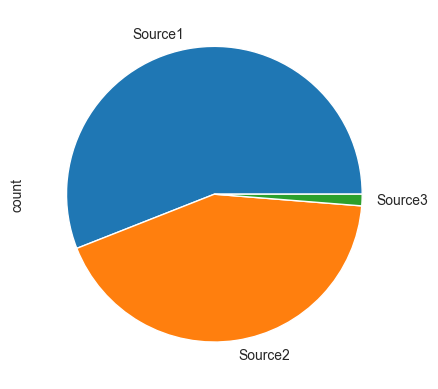

In [27]:
df.Source.value_counts().plot(kind = 'pie')  

Start Langitude and Start Lattitude... 

In [28]:
df.Start_Lng ,df.Start_Lat

(0          -84.058723
 1          -82.831184
 2          -84.032608
 3          -84.205582
 4          -84.188354
               ...    
 7728389   -117.379360
 7728390   -117.148060
 7728391   -117.847790
 7728392   -118.403020
 7728393   -117.230920
 Name: Start_Lng, Length: 7728394, dtype: float64,
 0          39.865147
 1          39.928059
 2          39.063148
 3          39.747753
 4          39.627781
              ...    
 7728389    34.002480
 7728390    32.766960
 7728391    33.775450
 7728392    33.992460
 7728393    34.133930
 Name: Start_Lat, Length: 7728394, dtype: float64)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

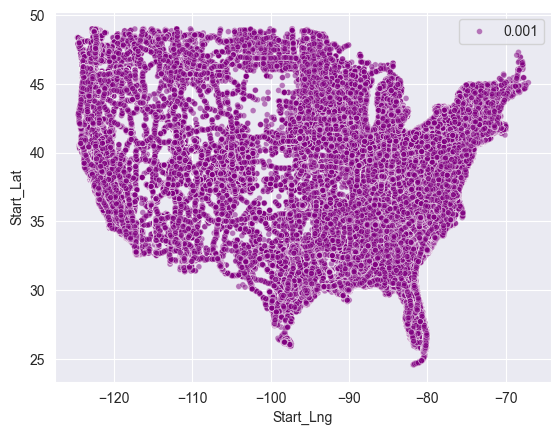

In [29]:
sns.scatterplot( x = df.Start_Lng , y = df.Start_Lat, size = 0.001  ,alpha = 0.5 ,color= 'purple') 

In [32]:
import folium 
from folium.plugins import HeatMap 
lat_lng_pairs = zip( list(df.Start_Lat[:50]) , list(df.Start_Lng[:50]) ) 
map_ = folium.Map()  
HeatMap(lat_lng_pairs).add_to(map_) 
map_

Temperature(F) converted into the ºC

<Axes: xlabel='Temperature(F)'>

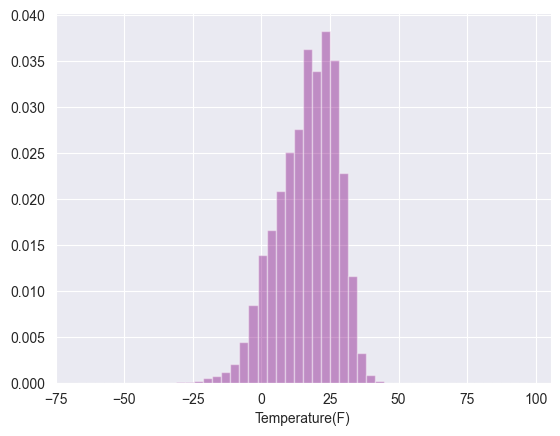

In [33]:
sns.distplot( (df['Temperature(F)'] - 32 ) * (5/9)   , kde = False , norm_hist = True , color = 'purple')

In [34]:
colder = df[df['Temperature(F)'] <= 15]['Temperature(F)'] 
warmer = df[df['Temperature(F)'] >15]['Temperature(F)'] 

<Axes: xlabel='Temperature(F)', ylabel='Density'>

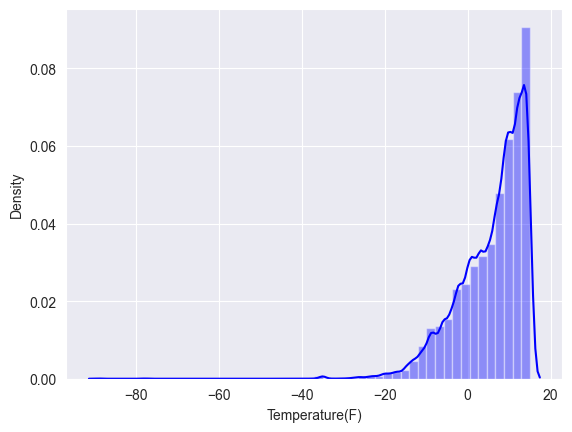

In [35]:
sns.distplot(colder , norm_hist = True  , color = 'blue') 

Weather Condition

<Axes: ylabel='Weather_Condition'>

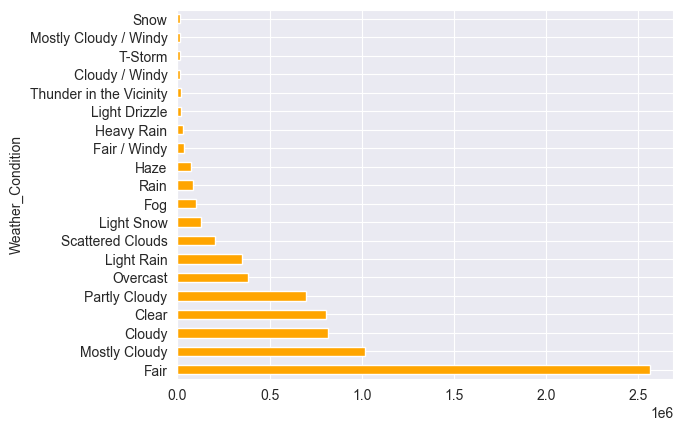

In [36]:
df.Weather_Condition.value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , color = 'orange') 

In [37]:
total_weather_conditions = df.Weather_Condition.unique()
len(total_weather_conditions) , total_weather_conditions

(145,
 array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
        'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
        'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
        'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
        'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
        'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
        'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
        'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
        'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
        'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
        'Light Rain Shower', 'Light Rain with Thunder',
        'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
        'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
        'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
        'Light Thu

<Axes: xlabel='count', ylabel='Density'>

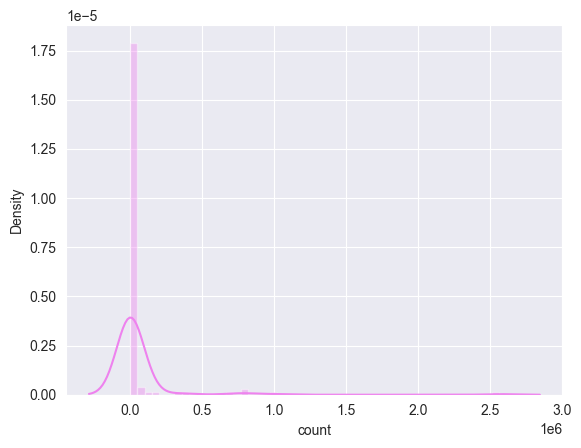

In [38]:
accidents_per_weather = df.Weather_Condition.value_counts() 
sns.distplot(accidents_per_weather , color = 'Violet') 

In [39]:
High_accident_weather = accidents_per_weather [accidents_per_weather >= 1000 ] 
low_accident_weather = accidents_per_weather [accidents_per_weather < 1000]   

len(High_accident_weather) / len(total_weather_conditions) * 100 , len(low_accident_weather) / len(total_weather_conditions) * 100

(32.41379310344827, 66.89655172413794)